In [82]:
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot
from math import floor
import numpy as np
from sklearn.preprocessing import MinMaxScaler


### Loading Model

In [83]:
model = keras.models.load_model('SavedModel_2022-04-07_0.1469.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_norm_0 (BatchNormaliza (None, 280, 11)           44        
_________________________________________________________________
lstm_0_1 (LSTM)              (None, 280, 125)          68500     
_________________________________________________________________
dropout_0_1 (Dropout)        (None, 280, 125)          0         
_________________________________________________________________
batch_norm_0_1 (BatchNormali (None, 280, 125)          500       
_________________________________________________________________
lstm_0_2 (LSTM)              (None, 280, 255)          388620    
_________________________________________________________________
dropout_0_2 (Dropout)        (None, 280, 255)          0         
_________________________________________________________________
lstm_1_1 (LSTM)              (None, 280, 125)         

### Making Prediction

In [84]:
df = pd.read_csv("preprocessedGM_MoreRecent.csv", parse_dates=['Date'],index_col=0)
df.dropna(inplace=True)
df.drop(df.columns.difference(['Date','Close','Tesla Trend','Musk Trend','GM Trend','EV Trend','Coronavirus Trend','Month','Day of the Month','Day of the Week','Day of the Year','Year']), 1, inplace=True)
df_predict = df.drop(df.tail(365).index).tail(280)
values = df_predict.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
predict_X = scaler.fit_transform(values)
predict_X = predict_X.reshape(-1, 280, len(df.columns))

print(predict_X.shape)

# Make Prediction
yhat = model.predict(predict_X)
yhat = yhat.reshape(-1,1)
print(yhat.shape)

(1, 280, 11)


C:\Users\thoma\AppData\Local\Temp\ipykernel_21808\1668313657.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['Date','Close','Tesla Trend','Musk Trend','GM Trend','EV Trend','Coronavirus Trend','Month','Day of the Month','Day of the Week','Day of the Year','Year']), 1, inplace=True)


(365, 1)


In [85]:
# Finding Quarterly Maxes in Prediction
predictDates = df.index[-365:]
numQuarters = floor(365 / 90)
quarter = floor(365/numQuarters)
print(quarter)
maxes = [predictDates[np.argmax(yhat[0:quarter], axis=0)]]
for i in range(0, numQuarters-1):
    maxes.append(predictDates[np.argmax(yhat[quarter*(i+1):quarter*(i+2)-1], axis=0)+quarter*(i+1)])

91


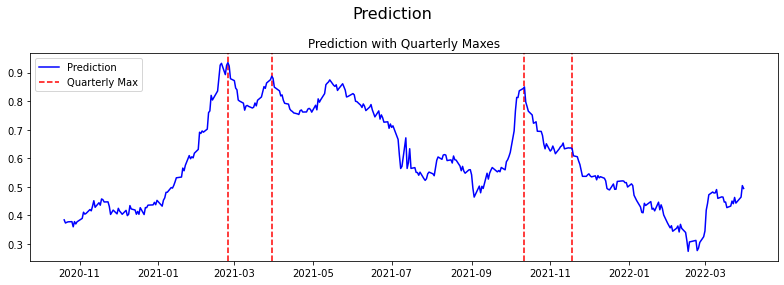

In [86]:
pyplot.figure(figsize=(11,4))

pyplot.suptitle("Prediction", fontsize=16)
pyplot.plot(predictDates, yhat, color='b', label="Prediction", zorder=2)
# Adding dashed lines for the quarterly maximums
pyplot.axvline(x=maxes[0], color='r', linestyle='--', label='Quarterly Max', zorder=1)
for xc in maxes[1:]:
    pyplot.axvline(x=xc, color='r', linestyle='--', zorder=1)
pyplot.legend(loc='upper left')
pyplot.title("Prediction with Quarterly Maxes")

pyplot.tight_layout()
pyplot.show()